In [1]:
%load_ext autoreload
%autoreload 2
import os
import torch
import unittest
import time
import pickle
import copy
import numpy as np
from torch import optim
from torch.utils.data import DataLoader
from generic_utils import load_config
from model import FFTNet, FFTNetModel
from dataset import LJSpeechDataset

torch.manual_seed(1)
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
MAX = 100
C = load_config('test_config.json')
OUT_PATH = os.path.join(C.output_path, C.run_name)
DATA_PATH = f"{OUT_PATH}/data/"

with open(f"{DATA_PATH}dataset_ids.pkl", "rb") as f:
    dataset_ids = pickle.load(f)

dataset = LJSpeechDataset(dataset_ids, DATA_PATH, C.num_quant, C.bits,
                          C.min_wav_len, C.max_wav_len)
dataloader = DataLoader(dataset, batch_size=1,
                        shuffle=False, collate_fn=dataset.collate_fn,
                        drop_last=True, num_workers=2)

 > Reading LJSpeech from - runs/fftnet/data/
 | > Number of instances : 13100
 | > Max wav length: 5000
 | > Min wav length: 0
 | > Receptive field: 2048


In [30]:
len(dataloader)

17

In [15]:
A = 10
c = 0
for data in dataloader:
    wav = data[0]
    mel = data[1]
    leng = data[2]
    target = data[3]
    wav_name = data[4]
    mel_name = data[5]
    c += 1
    print(c)
    if c == A:
        break

1
2
3
4
5
6
7
8
9
10


In [27]:
wav_name

['runs/fftnet/data/quant/LJ014-0061.npy']

In [28]:
mel_name

['runs/fftnet/data/mel/LJ014-0061.npy']

In [29]:
a = np.load('/home/erogol/Projects/WaveRNN/tmp/wavenetrnn/data/quant/LJ014-0061.npy')
a = 2 * a / (2 ** C.bits - 1.) - 1.
print(a)

[-0.00195695 -0.00195695 -0.00195695 ... -0.00195695 -0.00195695
 -0.00195695]


In [30]:
a = np.load(wav_name[0])
a = 2 * a / (2 ** C.bits - 1.) - 1.
print(a)

[-0.00195695 -0.00195695 -0.00195695 ... -0.00195695 -0.00195695
 -0.00195695]


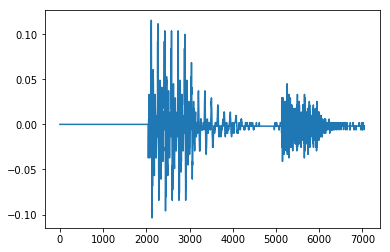

In [16]:
from matplotlib import pylab as plt
plt.plot(np.array(wav[0]))

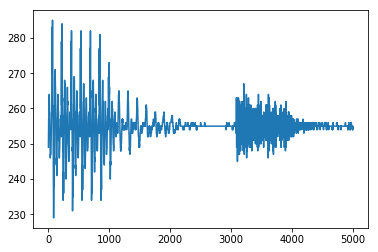

In [17]:
from matplotlib import pylab as plt
plt.plot(np.array(target[0]))

In [21]:
wav = ((wav + 1) / 2) * (2**C.bits - 1)

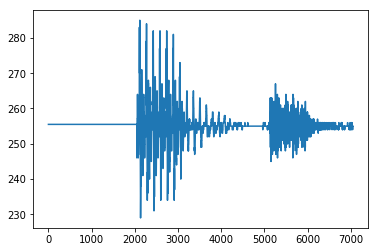

In [22]:
from matplotlib import pylab as plt
plt.plot(np.array(wav[0]))

In [23]:
wav = wav.type_as(target)

abs(wav[0, dataset.receptive_field:] - target[0, :-1]).sum()

wav[0, dataset.receptive_field:] - target[0, :-1]

assert abs(wav[0, dataset.receptive_field:] - target[0, :-1]).sum() == 0

In [29]:
# from visual import plot_spectrogram
# plot_spectrogram(mel[0].numpy(), dataset.ap);